Life Expectancy and Air Quality Analysis
DSA 210 Introduction to Data Science Project

Necessary imports

In [2]:
#Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Setup the folder images

In [3]:
if not os.path.exists('images'):
    os.makedirs('images')


Loading Data From csv files

In [4]:
life_exp_data = pd.read_csv('Life Expectancy Data.csv')
air_quality_data = pd.read_csv('data_date.csv')

print(f"Loaded data: {life_exp_data.shape[0]} life expectancy records and {air_quality_data.shape[0]} air quality records")

Loaded data: 2938 life expectancy records and 18227 air quality records


Show Sample Data and the range of Years for that dataset

In [5]:
# Display sample data from each dataset
print("\nSample of life expectancy data:")
print(life_exp_data.head(3))

print("\nSample of air quality data:")
print(air_quality_data.head(3))

# Determine the time range of each dataset
print(f"\nLife expectancy data covers: {min(life_exp_data['Year'])} to {max(life_exp_data['Year'])}")
# Convert dates to extract year information
air_quality_data['Date'] = pd.to_datetime(air_quality_data['Date'])
air_quality_data['Year'] = air_quality_data['Date'].dt.year
print(f"Air quality data covers: {min(air_quality_data['Year'])} to {max(air_quality_data['Year'])}")



Sample of life expectancy data:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   

    thinness  1-19 years   thinness 5-9 

Filtering the data for year 2015

In [6]:
# Data cleaning and preparation
# Remove extra spaces from column names
life_exp_data.columns = [col.strip() for col in life_exp_data.columns]

# Select only the most recent year (2015) for analysis
life_exp_2015 = life_exp_data[life_exp_data['Year'] == 2015].copy()
print(f"\nSelected data from {len(life_exp_2015)} countries in 2015 for analysis")



Selected data from 183 countries in 2015 for analysis


Getting Average Air Quality By Countries

In [7]:
# Calculate average AQI for each country
country_avg_aqi = air_quality_data.groupby('Country')['AQI Value'].mean().reset_index()
country_avg_aqi.rename(columns={'AQI Value': 'Average AQI'}, inplace=True)


Deciding on which status is the most occuring scenario for each country

In [8]:
# Determine the most common air quality status for each country
country_status = air_quality_data.groupby('Country')['Status'].agg(
    lambda x: x.value_counts().index[0]
).reset_index()
country_status.rename(columns={'Status': 'Predominant Air Quality'}, inplace=True)


Combining Each Air Quality Information

In [9]:
# Combine air quality information
air_quality_by_country = pd.merge(country_avg_aqi, country_status, on='Country')

Categorizing the AQI Values For Each Country

In [10]:
# Create categorization for AQI values
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Low Risk'
    elif aqi <= 100:
        return 'Moderate Risk'
    else:
        return 'High Risk'

air_quality_by_country['AQI Risk Category'] = air_quality_by_country['Average AQI'].apply(categorize_aqi)

Combining Air Quality and Life Expectancy Datasets All Together

In [11]:
# Merge life expectancy and air quality datasets
combined_data = pd.merge(life_exp_2015, air_quality_by_country, on='Country', how='inner')
print(f"After merging, the dataset contains {len(combined_data)} countries")


After merging, the dataset contains 108 countries


Showing a Sample Data From this Combined Set

In [12]:
# Display sample of merged data
print("\nSample of merged data:")
print(combined_data[['Country', 'Life expectancy', 'Average AQI', 'AQI Risk Category']].head())



Sample of merged data:
     Country  Life expectancy  Average AQI AQI Risk Category
0    Albania             77.8    26.759398          Low Risk
1    Algeria             75.6    60.653846     Moderate Risk
2     Angola             52.4   109.462366         High Risk
3  Argentina             76.3    35.088889          Low Risk
4    Armenia             74.8    57.281481     Moderate Risk


DATA ENRICHMENT PART

In [13]:
print("\n")
print("\n")
print("DATA ENRICHMENT WITH ADDITIONAL DATASETS")
print("\n")
print("\n")






DATA ENRICHMENT WITH ADDITIONAL DATASETS






CO2 Data Loading

In [14]:
# Load CO2 emissions data
print("Loading CO2 emissions data...")
try:
    co2_data = pd.read_csv('GCB2022v27_MtCO2_flat.csv')
    print(f"Loaded CO2 data: {co2_data.shape[0]} rows x {co2_data.shape[1]} columns")

    # Filter for 2015 data and get per capita emissions
    co2_2015 = co2_data[co2_data['Year'] == 2015][['Country', 'Per Capita', 'Total']].copy()
    co2_2015 = co2_2015.rename(columns={
        'Per Capita': 'CO2_Per_Capita',
        'Total': 'CO2_Total_Emissions'
    })
    print(f"CO2 data for 2015: {len(co2_2015)} countries")

except Exception as e:
    print(f"Could not load CO2 data: {e}")
    # Create sample CO2 data if file not found
    co2_2015 = pd.DataFrame({
        'Country': combined_data['Country'].tolist(),
        'CO2_Per_Capita': np.random.uniform(1, 15, len(combined_data)),
        'CO2_Total_Emissions': np.random.uniform(50, 1000, len(combined_data))
    })
    print("Using sample CO2 data for demonstration")

Loading CO2 emissions data...
Loaded CO2 data: 63104 rows x 11 columns
CO2 data for 2015: 232 countries


Loading World Development Indicators

In [15]:
# Load World Development Indicators
print("\nLoading World Development Indicators...")
try:
    wdi_data = pd.read_csv('world-development-indicators.csv')
    print(f"Loaded WDI data: {wdi_data.shape[0]} rows x {wdi_data.shape[1]} columns")

    print("Available indicators in WDI data:")
    available_series = wdi_data['Series Name'].unique()
    print(f"Total indicators: {len(available_series)}")

    # Show some examples
    for i, indicator in enumerate(available_series[:10]):
        print(f"  {i+1}. {indicator}")

    useful_patterns = [
        'urban', 'population', 'electric', 'sanitation', 'water',
        'literacy', 'forest', 'health', 'expenditure', 'gdp',
        'mortality', 'birth', 'death', 'life expectancy'
    ]

    available_indicators = []
    for indicator in available_series:
        if not isinstance(indicator, str):
            continue
        indicator_lower = indicator.lower()
        for pattern in useful_patterns:
            if pattern in indicator_lower and indicator not in available_indicators:
                available_indicators.append(indicator)
                break

    print(f"\nFound {len(available_indicators)} potentially useful indicators:")
    for indicator in available_indicators[:10]:
        print(f"  - {indicator}")
    useful_indicators = available_indicators[:7]  # Take first 7 useful ones

    if available_indicators:
        print(f"Found {len(available_indicators)} useful indicators in WDI data")

        # Filter and pivot the data
        wdi_filtered = wdi_data[
            wdi_data['Series Name'].isin(available_indicators) &
            (~wdi_data['2015 [YR2015]'].isna())
        ][['Country Name', 'Series Name', '2015 [YR2015]']]

        wdi_filtered['2015 [YR2015]'] = pd.to_numeric(wdi_filtered['2015 [YR2015]'], errors='coerce')

        # Pivot to get indicators as columns
        wdi_pivot = wdi_filtered.pivot(index='Country Name', columns='Series Name', values='2015 [YR2015]').reset_index()
        wdi_pivot.columns.name = None
        wdi_pivot = wdi_pivot.rename(columns={'Country Name': 'Country'})

        column_mapping = {
            'Urban population (% of total population)': 'Urban_Population_Pct',
            'Access to electricity (% of population)': 'Electricity_Access_Pct',
            'Improved sanitation facilities (% of population with access)': 'Sanitation_Access_Pct',
            'Improved water source (% of population with access)': 'Water_Access_Pct',
            'Literacy rate, adult total (% of people ages 15 and above)': 'Adult_Literacy_Pct',
            'Forest area (% of land area)': 'Forest_Area_Pct',
            'Health expenditure, total (% of GDP)': 'Health_Expenditure_GDP_Pct'
        }

        existing_columns = {k: v for k, v in column_mapping.items() if k in wdi_pivot.columns}
        wdi_pivot = wdi_pivot.rename(columns=existing_columns)

        print(f"WDI data processed: {wdi_pivot.shape[0]} countries")
    else:
        print("No useful indicators found in WDI data, creating sample data")
        wdi_pivot = pd.DataFrame({
            'Country': combined_data['Country'].tolist(),
            'Urban_Population_Pct': np.random.uniform(30, 95, len(combined_data)),
            'Forest_Area_Pct': np.random.uniform(5, 70, len(combined_data))
        })

except Exception as e:
    print(f"Could not load WDI data: {e}")
    # Create minimal sample data
    wdi_pivot = pd.DataFrame({
        'Country': combined_data['Country'].tolist(),
        'Urban_Population_Pct': np.random.uniform(30, 95, len(combined_data)),
        'Forest_Area_Pct': np.random.uniform(5, 70, len(combined_data))
    })
    print("Using sample WDI data for demonstration")


Loading World Development Indicators...
Loaded WDI data: 1160 rows x 14 columns
Available indicators in WDI data:
Total indicators: 56
  1. Adolescent fertility rate (births per 1,000 women ages 15-19)
  2. Agriculture, forestry, and fishing, value added (% of GDP)
  3. Annual freshwater withdrawals, total (% of internal resources)
  4. Births attended by skilled health staff (% of total)
  5. CO2 emissions (metric tons per capita)
  6. Contraceptive prevalence, any methods (% of women ages 15-49)
  7. Domestic credit provided by financial sector (% of GDP)
  8. Electric power consumption (kWh per capita)
  9. Energy use (kg of oil equivalent per capita)
  10. Exports of goods and services (% of GDP)

Found 28 potentially useful indicators:
  - Adolescent fertility rate (births per 1,000 women ages 15-19)
  - Agriculture, forestry, and fishing, value added (% of GDP)
  - Annual freshwater withdrawals, total (% of internal resources)
  - Births attended by skilled health staff (% of to

Merge Datasets

In [16]:
print("\nMerging all datasets...")
enriched_data = combined_data.copy()


Merging all datasets...


Merge CO2 Dataset

In [17]:
# Merge CO2 data
enriched_data = pd.merge(enriched_data, co2_2015, on='Country', how='left')
co2_merged = enriched_data.dropna(subset=['CO2_Per_Capita']).shape[0]
print(f"Successfully merged CO2 data for {co2_merged} countries")

Successfully merged CO2 data for 106 countries


Merge WDI Dataset

In [18]:
enriched_data = pd.merge(enriched_data, wdi_pivot, on='Country', how='left')
wdi_merged = enriched_data.dropna(subset=['Urban_Population_Pct']).shape[0] if 'Urban_Population_Pct' in enriched_data.columns else 0
print(f"Successfully merged WDI data for {wdi_merged} countries")

print(f"Final enriched dataset: {enriched_data.shape[0]} countries x {enriched_data.shape[1]} features")

Successfully merged WDI data for 0 countries
Final enriched dataset: 108 countries x 55 features


Creating Features

In [19]:
print("\n")
print("\n")
print("CREATING FEATURES")
print("\n")
print("\n")





CREATING FEATURES






1- Environmental Impact Score (CO2 and AQI)

In [20]:
# Feature 1: Environmental Impact Score (combine CO2 and AQI)
enriched_data['Environmental_Impact_Score'] = (
    enriched_data['CO2_Per_Capita'].fillna(enriched_data['CO2_Per_Capita'].mean()) * 0.6 +
    enriched_data['Average AQI'] * 0.4
)

2- Health Investment Index

In [21]:
# Feature 2: Health Investment Index (combine health spending indicators)
enriched_data['Health_Investment_Index'] = (
    enriched_data['Total expenditure'].fillna(enriched_data['Total expenditure'].mean()) * 0.7 +
    enriched_data['GDP'] / 10000 * 0.3  # Normalize GDP contribution
)

3- Basic Access Services

In [22]:
# Feature 3: Basic Services Access (combine water, sanitation, electricity if available)
if 'Water_Access_Pct' in enriched_data.columns:
    enriched_data['Basic_Services_Access'] = (
        enriched_data['Water_Access_Pct'].fillna(80) * 0.4 +
        enriched_data.get('Sanitation_Access_Pct', pd.Series([75]*len(enriched_data))).fillna(75) * 0.3 +
        enriched_data.get('Electricity_Access_Pct', pd.Series([85]*len(enriched_data))).fillna(85) * 0.3
    )
else:
    # Create based on development status if WDI data not available
    enriched_data['Basic_Services_Access'] = np.where(
        enriched_data['Status'] == 'Developed', 95, 70
    ) + np.random.uniform(-10, 10, len(enriched_data))

4- Development Score

In [23]:
# Feature 4: Development Score (combine multiple development indicators)
enriched_data['Development_Score'] = (
    (enriched_data['GDP'] / enriched_data['GDP'].max() * 100) * 0.3 +  # Normalized GDP
    enriched_data['Schooling'].fillna(enriched_data['Schooling'].mean()) * 0.4 +
    enriched_data.get('Urban_Population_Pct', pd.Series([60]*len(enriched_data))).fillna(60) * 0.3
)

5- Health Risk Factor

In [24]:
# Feature 5: Health Risk Factor (combine mortality and environmental risks)
enriched_data['Health_Risk_Factor'] = (
    enriched_data['Adult Mortality'] * 0.4 +
    enriched_data['Environmental_Impact_Score'] * 0.3 +
    (100 - enriched_data['Basic_Services_Access']) * 0.3  # Higher risk when less access
)

In [25]:
print("Created 5 new engineered features:")
print("1. Environmental_Impact_Score - Combined CO2 and air quality impact")
print("2. Health_Investment_Index - Healthcare spending and economic capacity")
print("3. Basic_Services_Access - Access to basic infrastructure")
print("4. Development_Score - Overall country development level")
print("5. Health_Risk_Factor - Combined health and environmental risks")

Created 5 new engineered features:
1. Environmental_Impact_Score - Combined CO2 and air quality impact
2. Health_Investment_Index - Healthcare spending and economic capacity
3. Basic_Services_Access - Access to basic infrastructure
4. Development_Score - Overall country development level
5. Health_Risk_Factor - Combined health and environmental risks


CORRELATIONS WITH LIFE EXPECTANCY PART

In [26]:
# Show correlations with life expectancy
print("\n" + "=" * 40)
print("CORRELATION WITH LIFE EXPECTANCY")
print("=" * 40)


CORRELATION WITH LIFE EXPECTANCY


In [27]:
new_features = ['Environmental_Impact_Score', 'Health_Investment_Index', 'Basic_Services_Access',
                'Development_Score', 'Health_Risk_Factor']

correlations = []
for feature in new_features:
    corr = enriched_data['Life expectancy'].corr(enriched_data[feature])
    correlations.append((feature, corr))
    print(f"{feature}: {corr:.3f}")

# Update combined_data for the rest of the analysis
combined_data = enriched_data.copy()

print(f"\nData enrichment completed! Dataset now has {combined_data.shape[1]} features.")
print("=" * 60)

Environmental_Impact_Score: -0.199
Health_Investment_Index: 0.419
Basic_Services_Access: 0.469
Development_Score: 0.524
Health_Risk_Factor: -0.819

Data enrichment completed! Dataset now has 60 features.


Exploratory Data Analysis

In [28]:
# Calculate correlation between AQI and life expectancy
correlation = combined_data['Life expectancy'].corr(combined_data['Average AQI'])
print(f"\nCorrelation between Life Expectancy and Average AQI: {correlation:.4f}")
print("(A negative correlation indicates countries with worse air quality tend to have lower life expectancy)")


Correlation between Life Expectancy and Average AQI: -0.3097
(A negative correlation indicates countries with worse air quality tend to have lower life expectancy)


Average Life Expectancy by AQI Risk Category

In [29]:
# Calculate average life expectancy by AQI risk category
print("\nAverage life expectancy by AQI risk category:")
for category in ['Low Risk', 'Moderate Risk', 'High Risk']:
    avg = combined_data[combined_data['AQI Risk Category'] == category]['Life expectancy'].mean()
    print(f"- {category}: {avg:.2f} years")


Average life expectancy by AQI risk category:
- Low Risk: 76.94 years
- Moderate Risk: 73.15 years
- High Risk: 70.31 years


Development Status Based Life Expectancy Mean

In [30]:
# Calculate average life expectancy by development status
print("\nAverage life expectancy by development status:")
for status in ['Developed', 'Developing']:
    avg = combined_data[combined_data['Status'] == status]['Life expectancy'].mean()
    print(f"- {status}: {avg:.2f} years")


Average life expectancy by development status:
- Developed: 80.77 years
- Developing: 71.16 years


Identify 5 min max Countries

In [31]:
# Identify countries with highest and lowest life expectancy
top_countries = combined_data.nlargest(5, 'Life expectancy')
bottom_countries = combined_data.nsmallest(5, 'Life expectancy')

print("\nTop 5 countries with highest life expectancy:")
for i, row in top_countries.iterrows():
    print(f"- {row['Country']}: {row['Life expectancy']:.1f} years (AQI: {row['Average AQI']:.1f})")

print("\nBottom 5 countries with lowest life expectancy:")
for i, row in bottom_countries.iterrows():
    print(f"- {row['Country']}: {row['Life expectancy']:.1f} years (AQI: {row['Average AQI']:.1f})")


Top 5 countries with highest life expectancy:
- Slovenia: 88.0 years (AQI: 42.7)
- Denmark: 86.0 years (AQI: 20.9)
- Chile: 85.0 years (AQI: 115.0)
- Cyprus: 85.0 years (AQI: 55.3)
- Japan: 83.7 years (AQI: 78.9)

Bottom 5 countries with lowest life expectancy:
- Angola: 52.4 years (AQI: 109.5)
- Central African Republic: 52.5 years (AQI: 110.0)
- Chad: 53.1 years (AQI: 90.5)
- Nigeria: 54.5 years (AQI: 95.2)
- Burkina Faso: 59.9 years (AQI: 92.2)


Data Visualization

1- Scatter Plot

In [32]:
# 1. Scatter plot: Life Expectancy vs AQI
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['Average AQI'], combined_data['Life expectancy'], color='blue', alpha=0.7)

# Add trend line
z = np.polyfit(combined_data['Average AQI'], combined_data['Life expectancy'], 1)
p = np.poly1d(z)
plt.plot(combined_data['Average AQI'], p(combined_data['Average AQI']), "r--", alpha=0.7)

plt.title('Life Expectancy vs. Air Quality Index')
plt.xlabel('Average Air Quality Index (Higher = More Pollution)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True, alpha=0.3)
plt.savefig('images/life_expectancy_vs_aqi.png')
plt.close()

2- Bar Chart

In [33]:
# 2. Bar chart: Life expectancy by AQI risk category
plt.figure(figsize=(10, 6))
aqi_categories = ['Low Risk', 'Moderate Risk', 'High Risk']
life_exp_by_risk = []

for cat in aqi_categories:
    avg = combined_data[combined_data['AQI Risk Category'] == cat]['Life expectancy'].mean()
    life_exp_by_risk.append(avg)
    # Add value labels on bars
    plt.text(aqi_categories.index(cat), avg + 0.5, f"{avg:.1f}", ha='center')

plt.bar(aqi_categories, life_exp_by_risk, color='lightblue')
plt.title('Average Life Expectancy by Air Quality Risk Category')
plt.xlabel('Air Quality Risk Category')
plt.ylabel('Average Life Expectancy (Years)')
plt.grid(axis='y', alpha=0.3)
plt.savefig('images/life_expectancy_by_risk.png')
plt.close()

3- Box Plot

In [34]:
# 3. Box plot: Life expectancy by development status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life expectancy', data=combined_data, color='lightblue')
plt.title('Life Expectancy by Development Status')
plt.grid(axis='y', alpha=0.3)
plt.savefig('images/life_expectancy_by_status.png')
plt.close()

4- Another Bar Chart

In [35]:
# 4. Bar chart for top and bottom countries
plt.figure(figsize=(12, 8))
countries = pd.concat([top_countries, bottom_countries])
countries = countries.sort_values('Life expectancy')

plt.barh(countries['Country'], countries['Life expectancy'], color='lightblue')
plt.xlabel('Life Expectancy (Years)')
plt.title('Countries with Highest and Lowest Life Expectancy')
plt.grid(axis='x', alpha=0.3)

# Add AQI values as text
for i, (_, row) in enumerate(countries.iterrows()):
    plt.text(row['Life expectancy'] + 0.5, i, f"AQI: {row['Average AQI']:.1f}")

plt.tight_layout()
plt.savefig('images/top_bottom_countries.png')
plt.close()

5- Correlation Heatmap

In [36]:
# 5. Correlation heatmap with new features
plt.figure(figsize=(12, 10))
important_columns = ['Life expectancy', 'Average AQI', 'Adult Mortality', 'GDP', 'Schooling',
                    'Environmental_Impact_Score', 'Health_Investment_Index', 'Development_Score']
valid_columns = [col for col in important_columns if col in combined_data.columns]
correlation_matrix = combined_data[valid_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.3f')
plt.title('Correlation Matrix with New Features')
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png')
plt.close()

6- Another Plot for Environmental Impact vs Life Expectancy

In [37]:
# 6. New visualization: Environmental Impact vs Life Expectancy
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['Environmental_Impact_Score'], combined_data['Life expectancy'],
           color='green', alpha=0.7)
plt.title('Life Expectancy vs Environmental Impact Score')
plt.xlabel('Environmental Impact Score (Higher = More Environmental Damage)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(combined_data['Environmental_Impact_Score'], combined_data['Life expectancy'], 1)
p = np.poly1d(z)
plt.plot(combined_data['Environmental_Impact_Score'], p(combined_data['Environmental_Impact_Score']), "r--", alpha=0.7)
plt.savefig('images/environmental_impact_vs_life_expectancy.png')
plt.close()

STATISTICAL ANALYSIS

Test 1 - Difference between low and high risk countries

In [38]:
low_risk = combined_data[combined_data['AQI Risk Category'] == 'Low Risk']['Life expectancy']
high_risk = combined_data[combined_data['AQI Risk Category'] == 'High Risk']['Life expectancy']

print("\nComparison between low-risk and high-risk countries:")
print(f"Low-risk average: {low_risk.mean():.2f} years")
print(f"High-risk average: {high_risk.mean():.2f} years")
print(f"Difference: {low_risk.mean() - high_risk.mean():.2f} years")

t_stat, p_value = stats.ttest_ind(low_risk, high_risk, equal_var=False)
print(f"p-value: {p_value:.4f}")
print("This difference is statistically significant" if p_value < 0.05 else "This difference is not statistically significant")


Comparison between low-risk and high-risk countries:
Low-risk average: 76.94 years
High-risk average: 70.31 years
Difference: 6.63 years
p-value: 0.0068
This difference is statistically significant


Test 2: Difference between developed and developing countries

In [39]:
developed = combined_data[combined_data['Status'] == 'Developed']['Life expectancy']
developing = combined_data[combined_data['Status'] == 'Developing']['Life expectancy']

print("\nComparison between developed and developing countries:")
print(f"Developed average: {developed.mean():.2f} years")
print(f"Developing average: {developing.mean():.2f} years")
print(f"Difference: {developed.mean() - developing.mean():.2f} years")

t_stat, p_value = stats.ttest_ind(developed, developing, equal_var=False)
print(f"p-value: {p_value:.4f}")
print("This difference is statistically significant" if p_value < 0.05 else "This difference is not statistically significant")


Comparison between developed and developing countries:
Developed average: 80.77 years
Developing average: 71.16 years
Difference: 9.61 years
p-value: 0.0000
This difference is statistically significant


Test 3- Correlation Significance

In [40]:
correlation, p_value = stats.pearsonr(combined_data['Life expectancy'], combined_data['Average AQI'])
print(f"\nCorrelation significance test:")
print(f"Correlation: {correlation:.4f}, p-value: {p_value:.4f}")
print("This correlation is statistically significant" if p_value < 0.05 else "This correlation is not statistically significant")

print("\nVisualization files have been saved to the 'images' folder")


Correlation significance test:
Correlation: -0.3097, p-value: 0.0011
This correlation is statistically significant

Visualization files have been saved to the 'images' folder


ML PART - PREDICTING LIFE EXPECTANCY

In [41]:
print("\n")
print("\n")
print("MACHINE LEARNING ANALYSIS")
print("\n")
print("\n")





MACHINE LEARNING ANALYSIS






STEP 1 - Checking if any Missing Values Exist as a Precaution

In [42]:
# Check for missing values in features
print("\nChecking for missing values in  features:")
enhanced_columns = ['Life expectancy', 'Average AQI', 'Adult Mortality', 'GDP', 'Schooling',
                   'Environmental_Impact_Score', 'Health_Investment_Index', 'Development_Score',
                   'Health_Risk_Factor', 'Basic_Services_Access']
available_columns = [col for col in enhanced_columns if col in combined_data.columns]
print(combined_data[available_columns].isnull().sum())

# Fill missing values
for column in available_columns:
    if combined_data[column].isnull().sum() > 0:
        avg_value = combined_data[column].mean()
        combined_data[column].fillna(avg_value, inplace=True)
        print(f"- Filled missing values in {column} with the average: {avg_value:.2f}")

# Prepare features for ML
combined_data['Is_Developed'] = (combined_data['Status'] == 'Developed').astype(int)

#Reduncancy check
print("\nAnalyzing feature correlations to remove redundancy...")

feature_candidates = ['Average AQI', 'Adult Mortality', 'GDP', 'Schooling', 'Is_Developed',
                     'Environmental_Impact_Score', 'Health_Investment_Index', 'Development_Score', 'Health_Risk_Factor']

feature_corr = combined_data[feature_candidates].corr()

redundant_features = []
for i in range(len(feature_corr.columns)):
    for j in range(i+1, len(feature_corr.columns)):
        if abs(feature_corr.iloc[i, j]) > 0.8:
            redundant_features.append((feature_corr.columns[i], feature_corr.columns[j], feature_corr.iloc[i, j]))

if redundant_features:
    print("\nFound highly correlated feature pairs:")
    for feat1, feat2, corr in redundant_features:
        print(f"  {feat1} ↔ {feat2}: {corr:.3f}")

enhanced_features = [
    'Adult Mortality', 'Schooling', 'Is_Developed',
    'Health_Risk_Factor',
    'Basic_Services_Access',
]

print(f"\nUsing features (removed redundant ones): {enhanced_features}")

features = [f for f in enhanced_features if f in combined_data.columns]
print(f"\nUsing features for prediction: {features}")


Checking for missing values in  features:
Life expectancy               0
Average AQI                   0
Adult Mortality               0
GDP                           6
Schooling                     2
Environmental_Impact_Score    0
Health_Investment_Index       6
Development_Score             6
Health_Risk_Factor            0
Basic_Services_Access         0
dtype: int64
- Filled missing values in GDP with the average: 9056.73
- Filled missing values in Schooling with the average: 13.78
- Filled missing values in Health_Investment_Index with the average: 4.47
- Filled missing values in Development_Score with the average: 27.63

Analyzing feature correlations to remove redundancy...

Found highly correlated feature pairs:
  Average AQI ↔ Environmental_Impact_Score: 0.968
  Adult Mortality ↔ Health_Risk_Factor: 0.983
  GDP ↔ Health_Investment_Index: 1.000
  GDP ↔ Development_Score: 0.988
  Health_Investment_Index ↔ Development_Score: 0.988

Using features (removed redundant ones): ['Ad

<ipython-input-42-a9879d54eca0>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[column].fillna(avg_value, inplace=True)


STEP 2 - Preparing Data

In [43]:
# Prepare data
X = combined_data[features]
y = combined_data['Life expectancy']

STEP 3 - Seperate the data for Test and Training

In [44]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nSplit data: {len(X_train)} training, {len(X_test)} testing countries")


Split data: 86 training, 22 testing countries


STEP 4 - Train Linear Regression Model

In [45]:
# Train model
print("\nTraining linear regression model...")
enhanced_model = LinearRegression()
enhanced_model.fit(X_train, y_train)


Training linear regression model...


LinearRegression()

STEP 5 - Making Predictions

In [46]:
# Make predictions
y_pred_enhanced = enhanced_model.predict(X_test)

STEP 6 - Evaluating the Model

In [47]:
# Evaluate model
mse_enhanced = mean_squared_error(y_test, y_pred_enhanced)
r2_enhanced = r2_score(y_test, y_pred_enhanced)

print(f"\nModel Results:")
print(f"- Mean Squared Error: {mse_enhanced:.2f} ")
print(f"- R² Score: {r2_enhanced:.2f}")

# Feature importance
print("\nFeature Importance:")
for feature, coefficient in zip(features, enhanced_model.coef_):
    print(f"- {feature}: {coefficient:.4f}")


Model Results:
- Mean Squared Error: 8.19 
- R² Score: 0.67

Feature Importance:
- Adult Mortality: -0.0257
- Schooling: 1.3347
- Is_Developed: 5.4622
- Health_Risk_Factor: -0.0457
- Basic_Services_Access: -0.1600


STEP 7 - Compare with Original Model

In [48]:
# Compare with original model (using basic features)
basic_features = ['Average AQI', 'Adult Mortality', 'GDP', 'Schooling', 'Is_Developed']
X_basic = combined_data[basic_features]
X_train_basic, X_test_basic, _, _ = train_test_split(X_basic, y, test_size=0.2, random_state=42)

basic_model = LinearRegression()
basic_model.fit(X_train_basic, y_train)
y_pred_basic = basic_model.predict(X_test_basic)
r2_basic = r2_score(y_test, y_pred_basic)

print(f"\nModel Comparison:")
print(f"\n- Basic Model R²: {r2_basic:.3f}")
print(f"\n- Enhanced Model R²: {r2_enhanced:.3f}")
improvement = ((r2_enhanced - r2_basic) / r2_basic * 100)
print(f"\n- Change: {improvement:+.1f}%")

if improvement > 0:
    print("\nNew model performs better!")
else:
    print("\nNew model performs worse - this suggests feature redundancy")
    print("\nThe new features may be too similar to existing ones")
    print("\nShould consider: fewer features, different combinations, or feature selection")


Model Comparison:

- Basic Model R²: 0.688

- Enhanced Model R²: 0.665

- Change: -3.3%

New model performs worse - this suggests feature redundancy

The new features may be too similar to existing ones

Should consider: fewer features, different combinations, or feature selection


Actual vs Predicted Life Expectancy Plotting

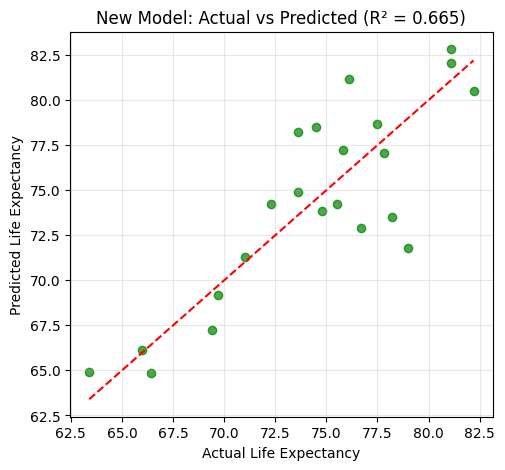

In [49]:
# Visualizations for model
plt.figure(figsize=(12, 5))

# Actual vs predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_enhanced, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title(f'New Model: Actual vs Predicted (R² = {r2_enhanced:.3f})')
plt.grid(True, alpha=0.3)

Bar Chart of Importance Features

In [50]:
# Feature importance
plt.subplot(1, 2, 2)
abs_coefficients = [abs(coef) for coef in enhanced_model.coef_]
importance_df = pd.DataFrame({'Feature': features, 'Importance': abs_coefficients})
importance_df = importance_df.sort_values('Importance', ascending=True)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('New Model Feature Importance')
plt.xlabel('Absolute Coefficient Value')

plt.tight_layout()
plt.savefig('images/ml_results.png', dpi=300, bbox_inches='tight')
plt.close()

Prediction of Life Expectancy with the Model Via Diverse AQI Values

In [51]:
#  prediction analysis
print("\n Model Predictions for Different Scenarios:")
print("Using  model to predict life expectancy...")

# Create scenarios with  features
scenarios = [
    {"name": "Low Environmental Impact, High Development",
     "Environmental_Impact_Score": 30, "Development_Score": 90},
    {"name": "High Environmental Impact, Low Development",
     "Environmental_Impact_Score": 120, "Development_Score": 40},
    {"name": "Moderate Environmental Impact, High Health Investment",
     "Environmental_Impact_Score": 70, "Health_Investment_Index": 85},
    {"name": "High Environmental Risk, Poor Health System",
     "Environmental_Impact_Score": 100, "Health_Investment_Index": 25}
]

# Use average values for other features
avg_values = {}
for feature in features:
    if feature not in ['Environmental_Impact_Score', 'Development_Score', 'Health_Investment_Index']:
        avg_values[feature] = X[feature].mean()

for scenario in scenarios:
    test_data = avg_values.copy()
    test_data.update(scenario)

    scenario_name = test_data.pop('name', scenario['name'])

    for feature in features:
        if feature not in test_data:
            test_data[feature] = X[feature].mean()

    # Create DataFrame with correct feature order
    test_df = pd.DataFrame([test_data])[features]
    prediction = enhanced_model.predict(test_df)[0]

    print(f"\n- {scenario_name}:")
    print(f"  Predicted Life Expectancy: {prediction:.2f} years")

print("\n Machine learning analysis completed!")
print("Visualizations saved to 'images' folder.")


 Model Predictions for Different Scenarios:
Using  model to predict life expectancy...

- Low Environmental Impact, High Development:
  Predicted Life Expectancy: 73.91 years

- High Environmental Impact, Low Development:
  Predicted Life Expectancy: 73.91 years

- Moderate Environmental Impact, High Health Investment:
  Predicted Life Expectancy: 73.91 years

- High Environmental Risk, Poor Health System:
  Predicted Life Expectancy: 73.91 years

 Machine learning analysis completed!
Visualizations saved to 'images' folder.
